# FeH line list from Hargreaves et al. (2010) (customapi)

Hargreaves et al. (2010), hereafter **Harg2010**, is a FeH line list at 2200 K for the $E^4 \Pi_i–A^4 \Pi_i$ FeH transition near $1.6 \mu \mathrm{m}$ based on experimental measurements and an ab initio calculation of the band strength.

It is used in Sonora models (e.g., [Marley et al., 2021](https://ui.adsabs.harvard.edu/abs/2021ApJ...920...85M/abstract); [Morley et al., 2024](https://ui.adsabs.harvard.edu/abs/2024ApJ...975...59M/abstract)) and has been validated in several brown dwarf atmosphere studies.

In [ ]:
from jax import config
config.update("jax_enable_x64", True)

database_dir = ".database/"

Since the wavenumber range of the Harg2010 list is from 4991 to 6320 cm-1, please set the wavenumber grid to cover this range.

In [3]:
from exojax.utils.grids import wavenumber_grid  
nu_grid, wav, res = wavenumber_grid(4991, 6320, 30000, "premodit", unit="cm-1")  

xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: xsmode=premodit
Your wavelength grid is in ***  descending  *** order
The wavenumber grid is in ascending order by definition.
Please be careful when you use the wavelength grid.


/home/yuikasagi/exojax/src/exojax/utils/grids.py:170: UserWarning: Resolution may be too small. R=127069.76131906603
  warnings.warn("Resolution may be too small. R=" + str(resolution), UserWarning)


Before loading the Harg2010 line list, we set ExoMol database to use its partition function.

As of May 2025, the current ExoMol uses the partition function from MoLLIST by Bernath et al. (2020).
For the FeH line list, it uses list from Wende et al. (2018), which is based on the list by Dulick et al. (2003). 

In [4]:
from exojax.spec.api import MdbExomol
  
mdb_exomol = MdbExomol(database_dir + "FeH/56Fe-1H/MoLLIST", nurange=nu_grid)

radis== 0.15.2
HITRAN exact name= (56Fe)H
HITRAN exact name= (56Fe)H
radis engine =  pytables
		 => Downloading from http://www.exomol.com/db/FeH/56Fe-1H/56Fe-1H__H2.broad


/home/yuikasagi/exojax/src/exojax/spec/api.py:135: UserWarning: The current version of radis does not support broadf_download (requires >=0.16).
  warnings.warn(msg, UserWarning)
/home/yuikasagi/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/yuikasagi/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/yuikasagi/exojax/src/exojax/utils/molname.py:63: UserWarning: No isotope number identified.
  warnings.warn("No isotope number identified.", UserWarning)
/home/yuikasagi/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/yuikasagi/exojax/src/exojax/utils/molname.py:63: 

Error: Couldn't download .broad file at http://www.exomol.com/db/FeH/56Fe-1H/56Fe-1H__H2.broad and save.
		 => Downloading from http://www.exomol.com/db/FeH/56Fe-1H/56Fe-1H__He.broad
Error: Couldn't download .broad file at http://www.exomol.com/db/FeH/56Fe-1H/56Fe-1H__He.broad and save.
		 => Downloading from http://www.exomol.com/db/FeH/56Fe-1H/56Fe-1H__air.broad
Molecule:  FeH
Isotopologue:  56Fe-1H
Background atmosphere:  H2
ExoMol database:  None
Local folder:  /home/yuikasagi/Develop/exojax/database/FeH/56Fe-1H/MoLLIST
Transition files: 
	 => File 56Fe-1H__MoLLIST.trans
Broadener:  H2
The default broadening parameters are used.


/home/yuikasagi/.pyenv/versions/3.11.9/envs/exojax2/lib/python3.11/site-packages/radis/api/exomolapi.py:1377: UserWarning: Could not load `56Fe-1H__H2.broad`. The default broadening parameters are used.

  warnings.warn(


Then, load the transition list from Harg2010 and convert it to the `MdbExomol` DataFrame format.

It should be noted that the Harg2010 list is provided at 2200 K, rather than Tref_original = 296.0 K.
So, line strengths are adjusted using the MoLLIST partition function evaluated at the original reference temperature.

Notes:
- The Hargreaves list contains many uncertain and unidentified lines:
    - Their lower state energies (E lower) have been already set to the average of all identified lower state energies (i.e., 2250.00 cm^-1) in the original file.
    - Their Einstein A values, lower state J values, and branch assignments are unknown. Temporary, we set;
        - The lower state J values are set to **the average of the J range from the identified lines**.
        - The branch is assumed to be **R**.
        - Einstein A values are estimated using **$A_{ij}=\frac{S_{ij} \cdot 8 \pi c \nu^2}{g \exp{(-hcE_{l}/kT)} (1 - \exp{(-hc\nu/kT)})}$**

In [5]:
import numpy as np
from exojax.spec.customapi import MdbHargreaves
from exojax.utils.constants import Tref_original   

QTref_original = np.array(mdb_exomol.QT_interp(Tref_original))
print("QTref_original", QTref_original)
Tref_raw = 2200
QTref_raw = np.array(mdb_exomol.QT_interp(Tref_raw))
print("QTref_2200K", QTref_raw)

mdb_hargreaves = MdbHargreaves(database_dir + "FeH/Hargreaves2010", nurange=nu_grid, QTref_original=QTref_original, QTref_raw=QTref_raw)


QTref_original 215.3488
QTref_2200K 11691.1386
radis engine =  pytables


/home/yuikasagi/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/yuikasagi/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(


The attributes of `MdbExomol` are then overwritten with those from `MdbHargreaves`, resulting in a new database instance. The original `MdbExomol` remains unchanged.

In [6]:
mdb_hargreaves = mdb_hargreaves.activate_with_exomol(mdb_exomol)

Broadener:  H2
The default broadening parameters are used.


/home/yuikasagi/.pyenv/versions/3.11.9/envs/exojax2/lib/python3.11/site-packages/radis/api/exomolapi.py:1377: UserWarning: Could not load `56Fe-1H__H2.broad`. The default broadening parameters are used.

  warnings.warn(


The Harg2010 line list is now ready for use!

We will now compare the spectra from ExoMol and Harg2010.

In [7]:
from exojax.spec.opacalc import OpaPremodit
from exojax.spec.atmrt import ArtEmisPure

from exojax.spec.contdb import CdbCIA
from exojax.spec.opacont import OpaCIA

cdb = CdbCIA(database_dir + "H2-H2_2011.cia", nurange=nu_grid)

Tlow = 500.
Thigh = 3500.

T0 = 2400.
alpha = 0.1
mmr_FeH = 5.e-7
logg = 4.5

def spectrum_from_mdb(mdb, plot=False):
    opa = OpaPremodit(mdb, nu_grid, auto_trange=[Tlow, Thigh], dit_grid_resolution=1.0)
    
    art = ArtEmisPure(
    nu_grid=nu_grid,
    pressure_btm=1.0e2,
    pressure_top=1.0e-3,
    nlayer=100,
    rtsolver="ibased",
    nstream=8,
    )
    art.change_temperature_range(Tlow, Thigh)
    Tarr = art.powerlaw_temperature(T0, alpha)

    opacia = OpaCIA(cdb, nu_grid=nu_grid)
    logacia_matrix = opacia.logacia_matrix(Tarr)

    mmr_profile = art.constant_mmr_profile(mmr_FeH)
    xsmatrix = opa.xsmatrix(Tarr, art.pressure)

    gravity = 10.**logg
    dtau_FeH = art.opacity_profile_xs(xsmatrix, mmr_profile, mdb.molmass, gravity)
    vmrH2 = 0.855  # VMR of H2
    mmw = 2.33  # mean molecular weight of the atmosphere
    dtaucia = art.opacity_profile_cia(logacia_matrix, Tarr, vmrH2, vmrH2, mmw, gravity)

    dtau = dtau_FeH + dtaucia
    if plot:
        from exojax.plot.atmplot import plotcf
        cf = plotcf(nu_grid, dtau, Tarr, art.pressure, art.dParr)
    F = art.run(dtau, Tarr)
    return F


/home/yuikasagi/exojax/src/exojax/spec/dtau_mmwl.py:13: FutureWarning: dtau_mmwl might be removed in future.
  warnings.warn("dtau_mmwl might be removed in future.", FutureWarning)


H2-H2


/home/yuikasagi/exojax/src/exojax/spec/opacalc.py:348: UserWarning: dit_grid_resolution is not None. Ignoring broadening_parameter_resolution.
  warnings.warn(


OpaPremodit: params automatically set.
default elower grid trange (degt) file version: 2
Robust range: 485.7803992045456 - 3514.832248251574 K
OpaPremodit: Tref_broadening is set to  1322.875655532295 K
# of reference width grid :  2
# of temperature exponent grid : 2
max value of  ngamma_ref_grid : 0.8430120971814759
min value of  ngamma_ref_grid : 0.6657485150702102
ngamma_ref_grid grid : [0.66574848 0.84301215]
max value of  n_Texp_grid : 0.5
min value of  n_Texp_grid : 0.5
n_Texp_grid grid : [0.49999997 0.50000006]


uniqidx: 0it [00:00, ?it/s]

Premodit: Twt= 1823.8027468832422 K Tref= 570.4914318566549 K
Making LSD:|--------------------| 0%

Making LSD:|####################| 100%
cross section (xsvector/xsmatrix) is calculated in the closed mode. The aliasing part cannnot be used.
wing cut width =  [1049.5625053665367, 1682.948173844723] cm-1
rtsolver:  ibased
Intensity-based n-stream solver, isothermal layer (e.g. NEMESIS, pRT like)


/home/yuikasagi/exojax/src/exojax/spec/opacalc.py:348: UserWarning: dit_grid_resolution is not None. Ignoring broadening_parameter_resolution.
  warnings.warn(


OpaPremodit: params automatically set.
default elower grid trange (degt) file version: 2
Robust range: 485.7803992045456 - 3514.832248251574 K
OpaPremodit: Tref_broadening is set to  1322.875655532295 K
# of reference width grid :  2
# of temperature exponent grid : 2
max value of  ngamma_ref_grid : 0.8429649979102459
min value of  ngamma_ref_grid : 0.6657557428820442
ngamma_ref_grid grid : [0.66575569 0.84296507]
max value of  n_Texp_grid : 0.5
min value of  n_Texp_grid : 0.5
n_Texp_grid grid : [0.49999997 0.50000006]


uniqidx: 0it [00:00, ?it/s]

Premodit: Twt= 1823.8027468832422 K Tref= 570.4914318566549 K
Making LSD:|####################| 100%


cross section (xsvector/xsmatrix) is calculated in the closed mode. The aliasing part cannnot be used.
wing cut width =  [1049.5625053665367, 1682.948173844723] cm-1
rtsolver:  ibased
Intensity-based n-stream solver, isothermal layer (e.g. NEMESIS, pRT like)


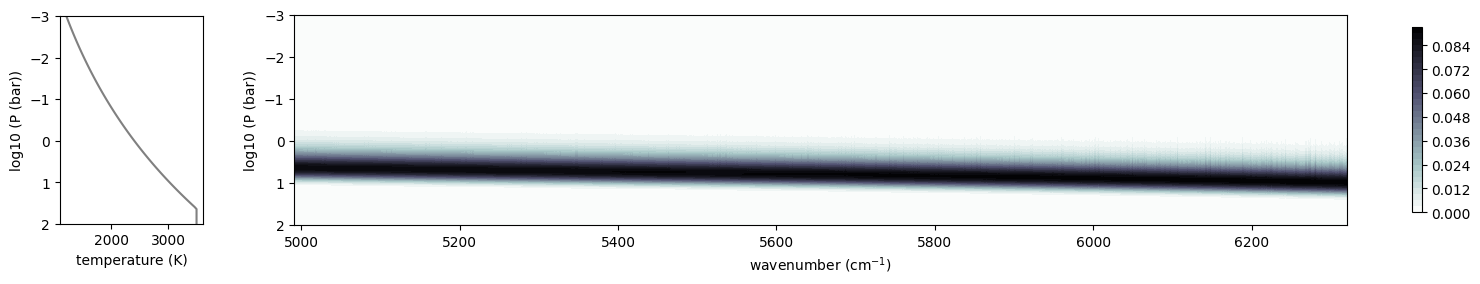

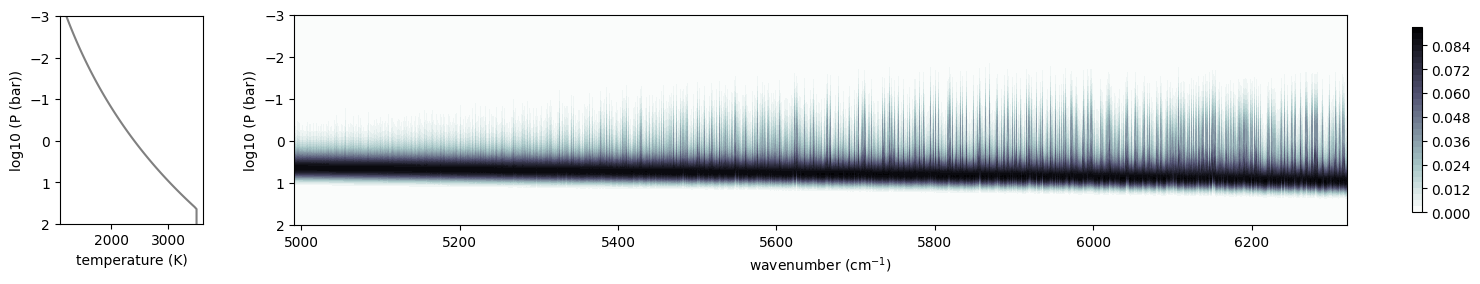

In [8]:
F_mollist = spectrum_from_mdb(mdb_exomol, plot=True)
F_hargreaves = spectrum_from_mdb(mdb_hargreaves, plot=True)


Overplot Sonora Model (Diamondback), which includes the Harg2010 FeH line list.

The all model can be downloaded from [here](https://zenodo.org/records/12735103). For this tutorial, we plot the model with Teff=2400K, g=3610m/s2 (logg~4.5), [M/H]=0.0.

In [9]:
import pandas as pd
sonora_file = "/home/yuikasagi/Develop/exojax/data/sonora_diamondback/spectra/t2400g3160nc_m0.0_co1.0.spec"
sonora_diamond = pd.read_csv(sonora_file, skiprows=3, sep="\s+", header=None, names=["wavelength","flux"]) #micron, W/m2/m
mask_sonora = (1.5<sonora_diamond["wavelength"]) & (sonora_diamond["wavelength"]<2.1)
sonora_diamond = sonora_diamond[mask_sonora]

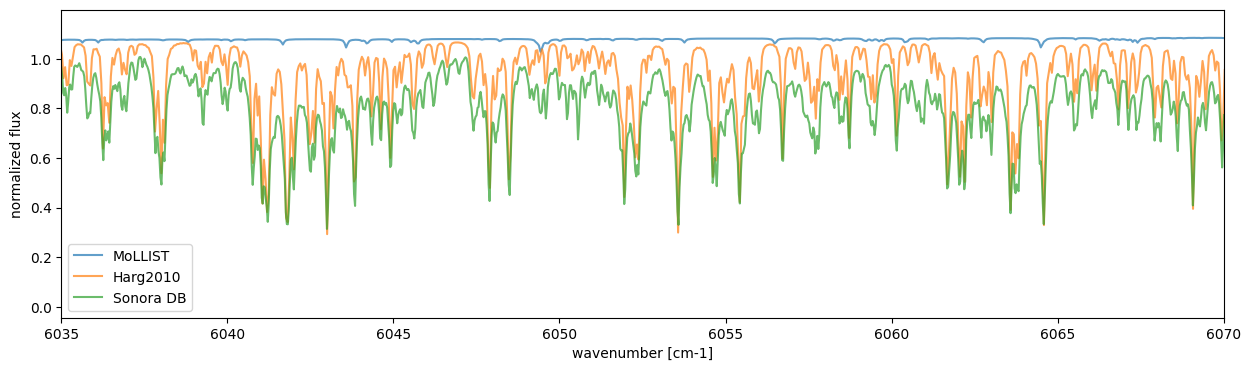

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(nu_grid, F_mollist/np.median(F_mollist), alpha=0.7, label="MoLLIST")
ax.plot(nu_grid, F_hargreaves/np.median(F_mollist), alpha=0.7, label="Harg2010")
ax.plot(1/(sonora_diamond["wavelength"].values*1e-4), sonora_diamond["flux"].values/sonora_diamond["flux"].median()/2, alpha=0.7, label="Sonora DB")

ax.legend()
ax.set(xlabel="wavenumber [cm-1]", ylabel="normalized flux")
ax.set(xlim=(6035, 6070))
plt.show()


We can see that the Harg2010 includes lines that are not present in MoLLIST. 
Moreover, when compared with the Sonora Diamondback model, the positions of these lines appear to align well. 
The differences in line intensities are likely due to the arbitrarily chosen abundances, as well as the fact that molecules other than FeH are included in the Sonora model.

It should be noted that the Sonora model uses the line intensities from Harg2010 scaled by a factor of 1/3 (see [Marley et al., 2021](https://ui.adsabs.harvard.edu/abs/2021ApJ...920...85M/abstract); [Morley et al., 2024](https://ui.adsabs.harvard.edu/abs/2024ApJ...975...59M/abstract)), and `MdbHargreaves` also adopts this scaling by default.